# WeatherPy
----

#### Note
#Observable trends

As the locations got closer to the equator the humidity increased.

Cities in the Northern and Southern Hemispheres were cooler the farther they were from the Equator.

At the time this data was collected wind speed and cloudiness was not greatly influenced by the proximity to the Equator.

Daren Hamilton

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:
lat_lngs


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
print(json.dumps(requests.get(query_url + 'lompoc').json(), indent=3))

{
   "coord": {
      "lon": -120.46,
      "lat": 34.64
   },
   "weather": [
      {
         "id": 800,
         "main": "Clear",
         "description": "clear sky",
         "icon": "01d"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 21.21,
      "feels_like": 17.84,
      "temp_min": 19,
      "temp_max": 23.33,
      "pressure": 1014,
      "humidity": 60
   },
   "visibility": 10000,
   "wind": {
      "speed": 6.2,
      "deg": 250,
      "gust": 8.7
   },
   "clouds": {
      "all": 0
   },
   "dt": 1596323348,
   "sys": {
      "type": 1,
      "id": 4747,
      "country": "US",
      "sunrise": 1596287544,
      "sunset": 1596337424
   },
   "timezone": -25200,
   "id": 5367788,
   "name": "Lompoc",
   "cod": 200
}


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(jason.dumps(response, indent=4))
name = []
lat = []
long = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#loop through cities
for city in cities:
    response = requests.get(query_url + city).json()    
    print(f"The name infomation recieved is: {city}")
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

#         print(f"The name infomation recieved is: {city}")
       
       
    except:
        print('no city data')
        pass

        

The name infomation recieved is: cidreira
The name infomation recieved is: bokspits
no city data
The name infomation recieved is: lebu
The name infomation recieved is: rikitea
The name infomation recieved is: coihueco
The name infomation recieved is: ushuaia
The name infomation recieved is: busselton
The name infomation recieved is: kloulklubed
The name infomation recieved is: turukhansk
The name infomation recieved is: pontianak
The name infomation recieved is: meilu
no city data
The name infomation recieved is: atuona
The name infomation recieved is: port elizabeth
The name infomation recieved is: poronaysk
The name infomation recieved is: punta arenas
The name infomation recieved is: barrow
The name infomation recieved is: sibolga
The name infomation recieved is: vydrino
The name infomation recieved is: vardo
The name infomation recieved is: portland
The name infomation recieved is: storm lake
The name infomation recieved is: cabo san lucas
The name infomation recieved is: east lond

The name infomation recieved is: bilma
The name infomation recieved is: sao francisco de assis
The name infomation recieved is: haines junction
The name infomation recieved is: fukue
The name infomation recieved is: marzuq
The name infomation recieved is: flinders
The name infomation recieved is: carnarvon
The name infomation recieved is: zhangjiakou
The name infomation recieved is: ondangwa
The name infomation recieved is: caravelas
The name infomation recieved is: souillac
The name infomation recieved is: kozhevnikovo
The name infomation recieved is: ryotsu
The name infomation recieved is: pevek
The name infomation recieved is: verkhoshizhemye
The name infomation recieved is: kabalo
The name infomation recieved is: kysyl-syr
The name infomation recieved is: mezen
The name infomation recieved is: bud
The name infomation recieved is: yasnyy
The name infomation recieved is: high level
The name infomation recieved is: nantucket
The name infomation recieved is: choix
The name infomation r

The name infomation recieved is: guarapari
The name infomation recieved is: glotovka
The name infomation recieved is: oppdal
The name infomation recieved is: road town
The name infomation recieved is: el alto
The name infomation recieved is: bethanien
The name infomation recieved is: turiacu
The name infomation recieved is: sitka
The name infomation recieved is: nhulunbuy
The name infomation recieved is: nguruka
The name infomation recieved is: taree
The name infomation recieved is: verkhnyaya sysert
The name infomation recieved is: cumaribo
no city data
The name infomation recieved is: coxim
The name infomation recieved is: alyangula
The name infomation recieved is: husavik
The name infomation recieved is: zhezkazgan
The name infomation recieved is: camacupa
The name infomation recieved is: mount gambier
The name infomation recieved is: san ramon
The name infomation recieved is: farmersville
The name infomation recieved is: la paz centro
The name infomation recieved is: grand river so

The name infomation recieved is: nicoya
The name infomation recieved is: powell river
The name infomation recieved is: isangel
The name infomation recieved is: tevaitoa
The name infomation recieved is: coffeyville
The name infomation recieved is: russkaya polyana
The name infomation recieved is: suntar
The name infomation recieved is: sauda
The name infomation recieved is: seabra
The name infomation recieved is: palanga
The name infomation recieved is: zhanaozen
The name infomation recieved is: san joaquin
The name infomation recieved is: longlac
no city data
The name infomation recieved is: tosno
The name infomation recieved is: alta floresta
The name infomation recieved is: ahuimanu
The name infomation recieved is: manono
The name infomation recieved is: amahai
The name infomation recieved is: naranjal
The name infomation recieved is: ayr
The name infomation recieved is: mersing
The name infomation recieved is: mahibadhoo
The name infomation recieved is: barcelona
The name infomation

In [8]:
cities_dict = {
    "City": name,
    "Lat": lat, 
    "Long": long, 
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date}
    
cities_df = pd.DataFrame(cities_dict)     

cities_df



,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.18,-50.21,15.16,74,0,3.32,BR,1596319681
1,Lebu,-37.62,-73.65,11.18,93,28,3.51,CL,1596319681
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596319682
3,Coihueco,-36.62,-71.83,12.78,100,75,6.70,CL,1596319682
4,Ushuaia,-54.80,-68.30,6.00,75,40,2.10,AR,1596319613
...,...,...,...,...,...,...,...,...,...
546,Mangochi,-14.48,35.26,16.50,80,24,2.84,MW,1596319815
547,Sirte,31.21,16.59,25.42,81,0,1.36,LY,1596319815
548,Comodoro Rivadavia,-45.87,-67.50,15.00,38,100,15.40,AR,1596319816
549,Susanino,58.15,41.59,10.60,96,8,3.63,RU,1596319816


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
cities_df.dtypes


City           object
Lat           float64
Long          float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
cities_df[cities_df.Humidity >100]

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df

In [24]:
# Export the City_Data into a csv

clean_city_data.to_csv('clean city data', header=True, index=False)

In [26]:
cities  = pd.read_csv('clean city data')
cities

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.18,-50.21,15.16,74,0,3.32,BR,1596319681
1,Lebu,-37.62,-73.65,11.18,93,28,3.51,CL,1596319681
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596319682
3,Coihueco,-36.62,-71.83,12.78,100,75,6.70,CL,1596319682
4,Ushuaia,-54.80,-68.30,6.00,75,40,2.10,AR,1596319613
...,...,...,...,...,...,...,...,...,...
546,Mangochi,-14.48,35.26,16.50,80,24,2.84,MW,1596319815
547,Sirte,31.21,16.59,25.42,81,0,1.36,LY,1596319815
548,Comodoro Rivadavia,-45.87,-67.50,15.00,38,100,15.40,AR,1596319816
549,Susanino,58.15,41.59,10.60,96,8,3.63,RU,1596319816


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

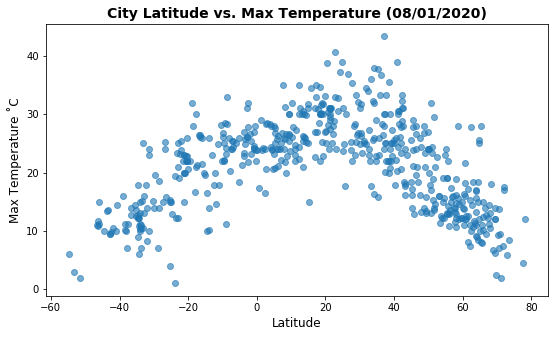

In [135]:
plt.figure(figsize=(9,5))
x_values = cities["Lat"]
y_values = cities["Max Temp"]
plt.scatter(x_values,y_values, alpha=0.6)
plt.title("City Latitude vs. Max Temperature (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Max Temperature ˚C", fontdict={"fontsize": 12})
plt.savefig('latitude_vs_temperature.png', dpi=125)
plt.show()

## Latitude vs. Humidity Plot

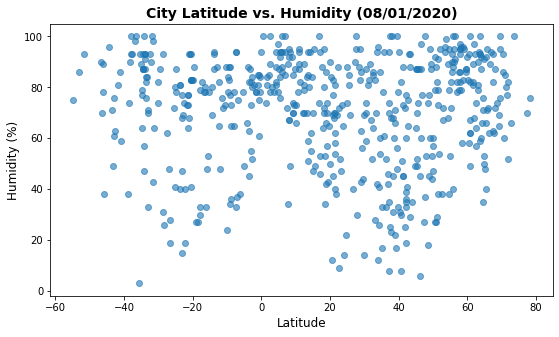

In [136]:
# Creat a Scatter Plot for temperature vs humidity

plt.figure(figsize=(9,5))
x_values = cities["Lat"]
y_values = cities["Humidity"]
plt.scatter(x_values,y_values, alpha=0.6)
plt.title("City Latitude vs. Humidity (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity (%)", fontdict={"fontsize": 12})
plt.savefig('latitude_vs_humidity.png', dpi=125)
plt.show()



## Latitude vs. Cloudiness Plot

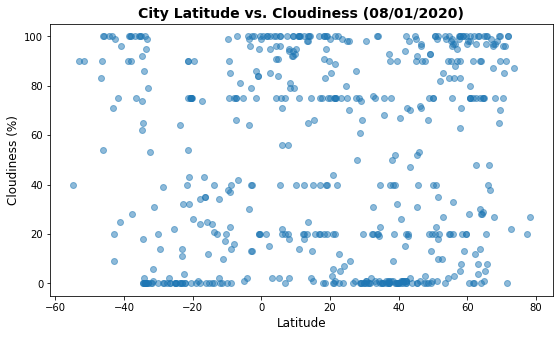

In [137]:
plt.figure(figsize=(9,5))
x_values = cities["Lat"]
y_values = cities["Cloudiness"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs. Cloudiness (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Cloudiness (%)", fontdict={"fontsize": 12})
plt.savefig('latitude_vs_cloudiness.png', dpi=125)
plt.show()


## Latitude vs. Wind Speed Plot

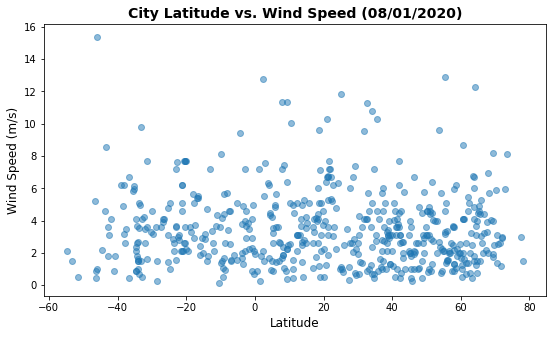

In [134]:
plt.figure(figsize=(9,5))
x_values = cities["Lat"]
y_values = cities["Wind Speed"]
plt.scatter(x_values,y_values, alpha=0.5)
plt.title("City Latitude vs. Wind Speed (08/01/2020)", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})
plt.savefig('latitude_vs_wind_speed.png', dpi=125)
plt.show()


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [124]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = cities.loc[cities['Lat']>=0]
north_hem.head(3)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,Kloulklubed,7.04,134.26,25.00,94,75,1.50,PW,1596319683
7,Turukhansk,65.82,87.98,12.33,71,8,3.06,RU,1596319683
11,Poronaysk,49.22,143.12,15.74,95,93,5.79,RU,1596319684


In [125]:
south_hem = cities.loc[cities['Lat']<0]
south_hem.head(3)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.18,-50.21,15.16,74,0,3.32,BR,1596319681
1,Lebu,-37.62,-73.65,11.18,93,28,3.51,CL,1596319681
2,Rikitea,-23.12,-134.97,23.29,77,11,3.64,PF,1596319682


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4491072957472998


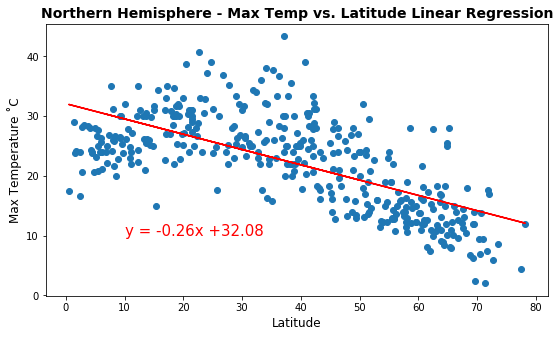

In [138]:
plt.figure(figsize=(9,5))
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Max Temperature ˚C", fontdict={"fontsize": 12})


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

# Print r square value

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png', dpi=125)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.566053421540612


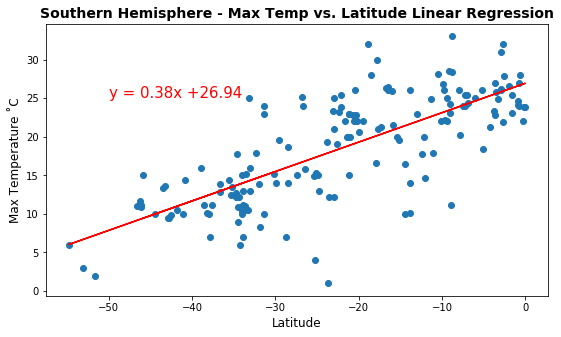

In [139]:
plt.figure(figsize=(9,5))
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Max Temperature ˚C", fontdict={"fontsize": 12})

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png', dpi=125)
plt.show()




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.598554625788892e-07


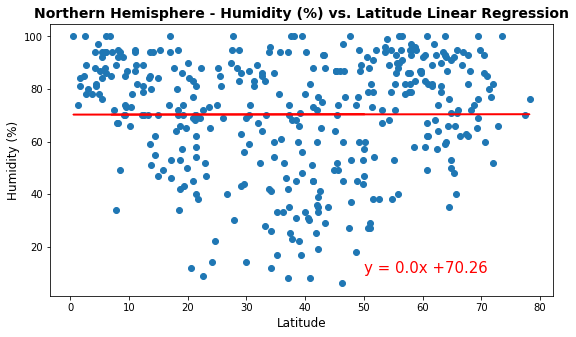

In [140]:
plt.figure(figsize=(9,5))
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity (%)", fontdict={"fontsize": 12})

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png', dpi=125)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006842568120351306


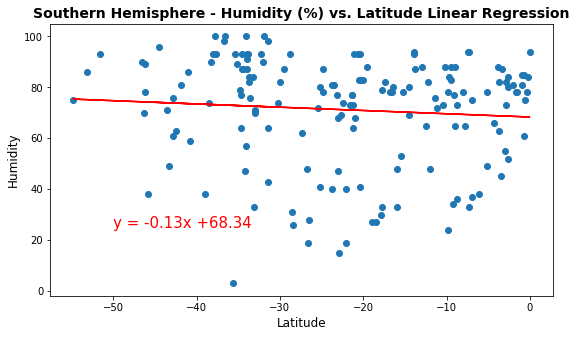

In [141]:
plt.figure(figsize=(9,5))
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Humidity", fontdict={"fontsize": 12})

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png', dpi=125)
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 4.803002738727149e-05


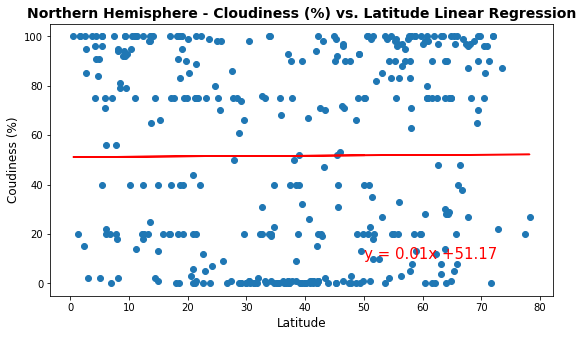

In [142]:
plt.figure(figsize=(9,5))
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Coudiness (%)", fontdict={"fontsize": 12})

# Perform a linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png', dpi=125)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004482725206810711


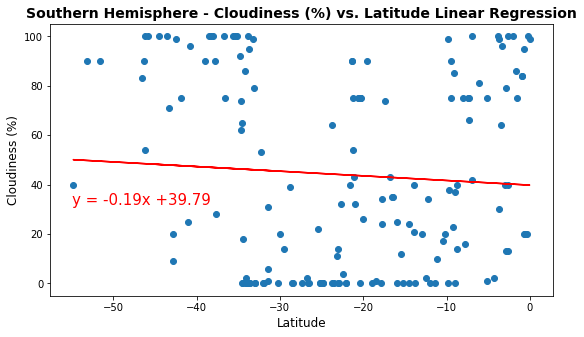

In [143]:
plt.figure(figsize=(9,5))
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Cloudiness (%)", fontdict={"fontsize": 12})

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,32),fontsize=15,color="red")

# Print r square value

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png', dpi=125)
plt.show()

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-squared is: 0.010439244574587543


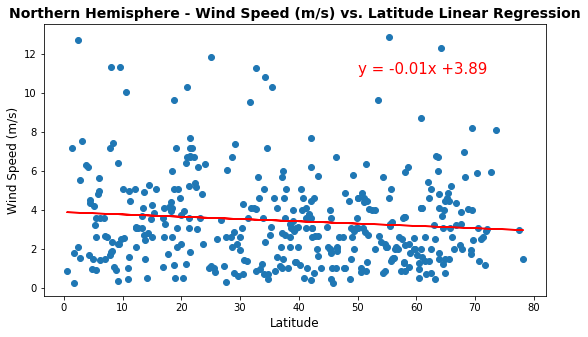

In [144]:
plt.figure(figsize=(9,5))
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,11),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png', dpi=125)
plt.show()

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-squared is: 0.0007019109881283263


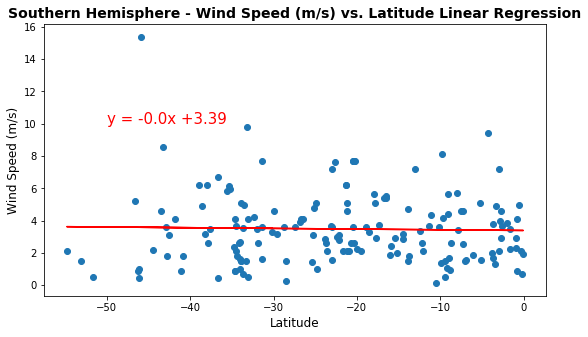

In [145]:
plt.figure(figsize=(9,5))
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression", fontdict={"fontweight":"bold", "fontsize": 14})
plt.xlabel("Latitude", fontdict={"fontsize": 12})
plt.ylabel("Wind Speed (m/s)", fontdict={"fontsize": 12})

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r square value

print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png', dpi=125)
plt.show()